In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
from tensorflow.keras.utils import to_categorical

img_rows, img_cols = 28, 28
channels = 1
num_classes = 10
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('Train shape:x=', x_train.shape, ',y=', y_train.shape)
print('Test shape:x=', x_test.shape, ',y=', y_test.shape)

Train shape:x= (60000, 28, 28, 1) ,y= (60000, 10)
Test shape:x= (10000, 28, 28, 1) ,y= (10000, 10)


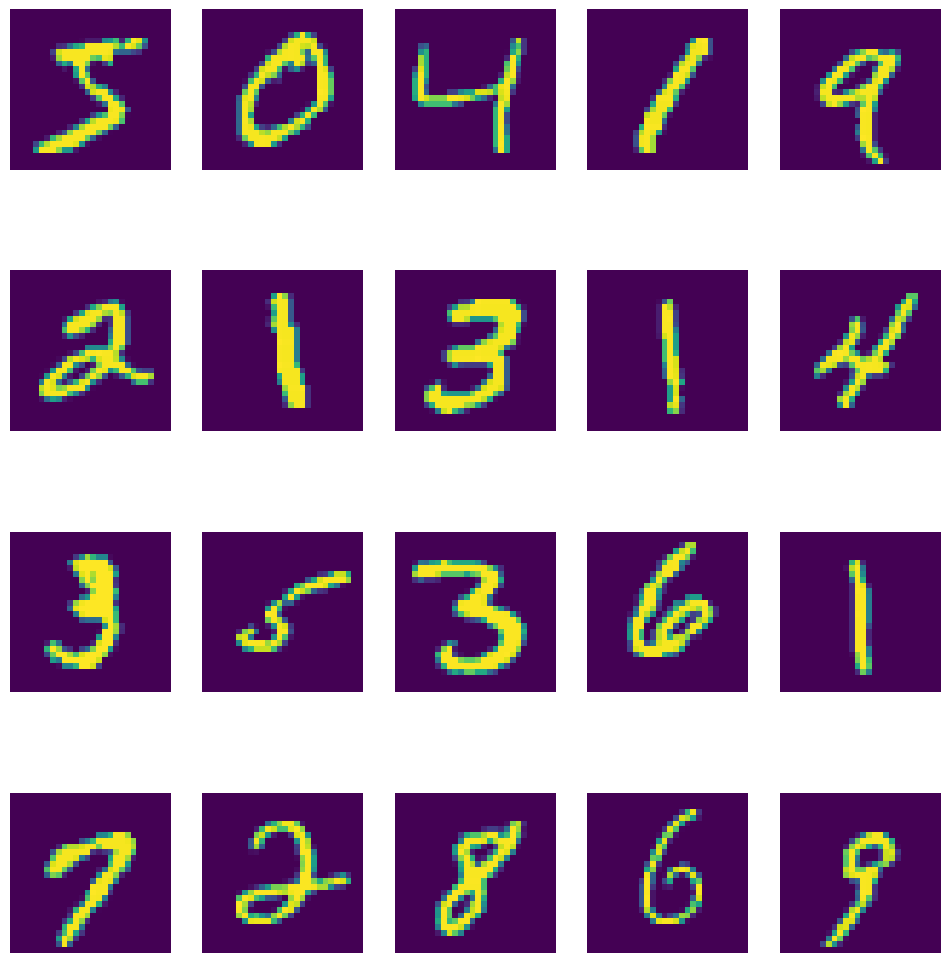

In [4]:
def plot_images(ims, figsize=(12, 13), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    
    f = plt.figure(figsize=figsize)
    rows = len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols +1
    
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
            
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
plot_images(x_train[0:20], cols=5)

In [6]:
from sklearn.ensemble import RandomForestClassifier

x_train_flat = x_train.reshape((len(x_train), -1))
x_test_flat = x_test.reshape((len(x_test), -1))

clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train_flat, y_train)


RandomForestClassifier(n_jobs=2, random_state=0)


Train accuracy = 1.0
Valid accuracy= 1.0


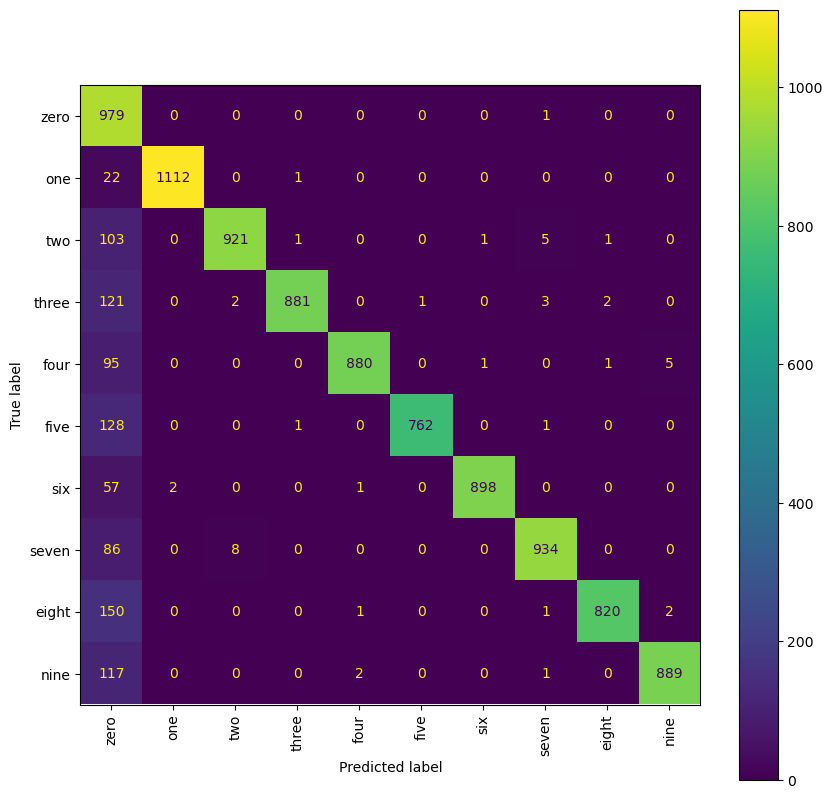

In [11]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = clf.predict(x_train_flat)
y_test_pred = clf.predict(x_test_flat)
print('\nTrain accuracy =', accuracy_score(y_train, y_train_pred))
print('Valid accuracy=', accuracy_score(y_test,y_test))

y_pred_results = [class_names[np.argmax(x)] for x in y_test_pred]
y_true_results = [class_names[np.argmax(x)] for x in y_test]
cm = confusion_matrix(y_true_results, y_pred_results, labels=class_names)
fig_size=plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [10, 10]
cm_disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
cm_disp.plot(values_format='d', cmap='viridis', ax=None, xticks_rotation='vertical')
plt.show()